In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('farmer.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [4]:
labels = df.groupby('label')

In [5]:
labels[['humidity']].mean()

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [6]:
label = list(labels[['N']].mean().index)  
avg_nitrogen = list(labels[['N']].mean().values.ravel())  #ravel convert array in 1d 

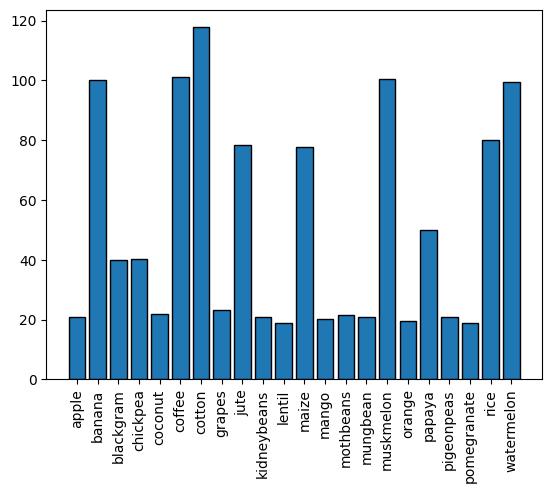

In [7]:
plt.bar(x = label,height=avg_nitrogen, ec ='k')
plt.xticks(rotation = 90)
plt.show()


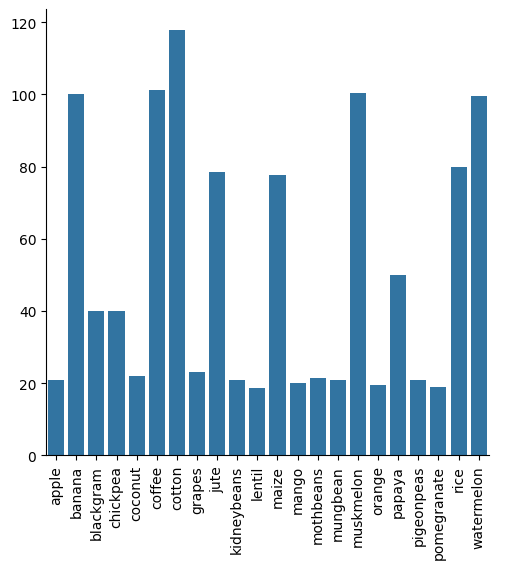

In [8]:
sns.catplot(x = label , y= avg_nitrogen,kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

In [9]:
x = df.drop('label', axis= 1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


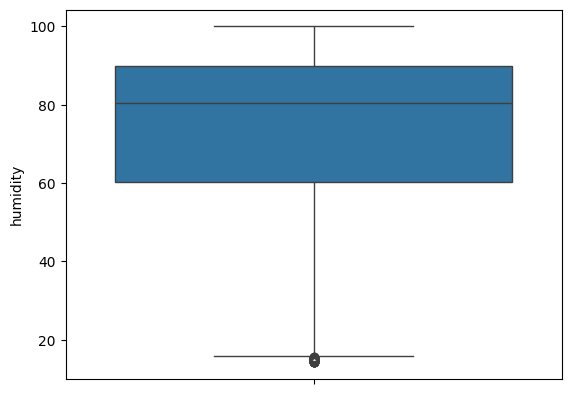

In [10]:
sns.boxplot(x['humidity'])
plt.show()

In [11]:
import warnings
warnings.filterwarnings("ignore")

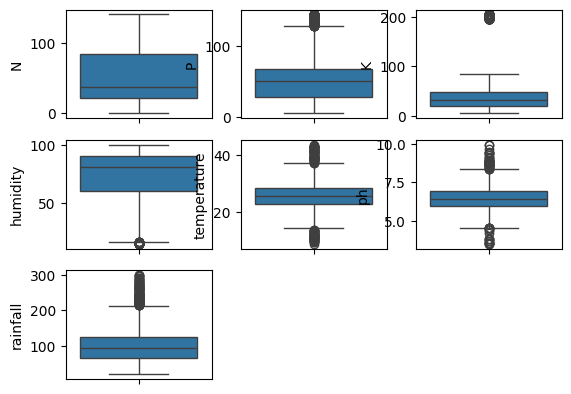

In [12]:
plt.subplot(3,3,1)
sns.boxplot(df['N'])
plt.subplot(3,3,2)
sns.boxplot(df['P'])
plt.subplot(3,3,3)
sns.boxplot(df['K'])
plt.subplot(3,3,4)
sns.boxplot(df['humidity'])
plt.subplot(3,3,5)
sns.boxplot(df['temperature'])
plt.subplot(3,3,6)
sns.boxplot(df['ph'])
plt.subplot(3,3,7)
sns.boxplot(df['rainfall'])

plt.show()

In [13]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


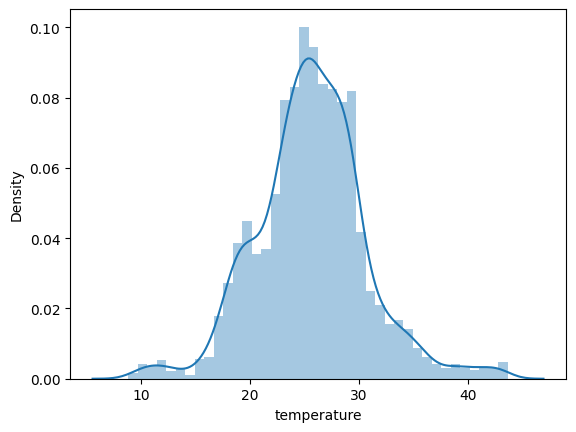

In [14]:
sns.distplot(x['temperature'])
plt.show()

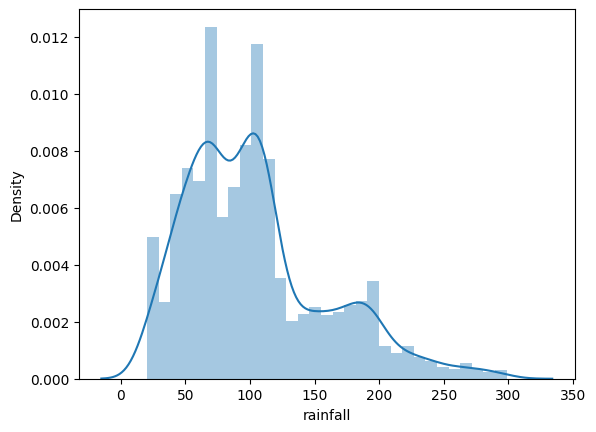

In [15]:
sns.distplot(x['rainfall'])
plt.show()

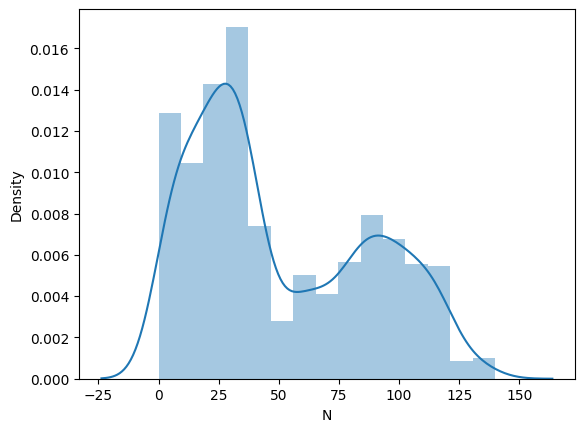

In [16]:
sns.distplot(x["N"])
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
std = StandardScaler()

In [19]:
x_transformed = std.fit_transform(x)

In [20]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

<Axes: ylabel='Density'>

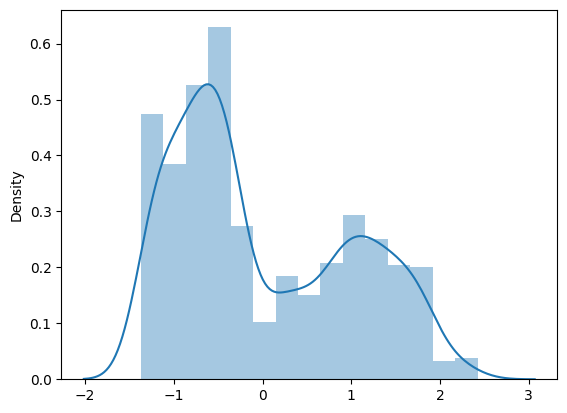

In [21]:
sns.distplot(x_transformed[:,0])

In [22]:
pd.DataFrame(x_transformed).describe()[0][1]

-1.0335167065601457e-16

In [23]:
x['N'].max()

140

In [24]:
desc = pd.DataFrame(x_transformed).describe()
desc_formatted = desc.applymap(lambda x: f"{int(x):d}")
desc_formatted

,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0
50%,0,0,0,0,0,0,0
75%,0,0,0,0,0,0,0
max,2,2,3,3,1,4,3


In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans()

In [27]:
km.fit(x_transformed)

KMeans()

In [28]:
km.fit_predict(x_transformed)

array([5, 5, 5, ..., 2, 2, 2])

In [29]:
label = km.labels_
label                             # one more way for prediction

array([5, 5, 5, ..., 2, 2, 2])

In [30]:
df['label_or_cluster8'] = label

In [31]:
df[df['label']=='rice']['label_or_cluster8'].value_counts()

label_or_cluster8
5    100
Name: count, dtype: int64

In [32]:
df[df['label_or_cluster8']==3]['label'].value_counts()


label
mungbean       100
blackgram      100
orange         100
lentil          99
pomegranate     98
mothbeans       57
papaya          33
mango           12
pigeonpeas      11
maize            2
coconut          2
Name: count, dtype: int64

In [33]:
df[df['label_or_cluster8']==5]['label'].value_counts()

label
rice           100
coconut         97
jute            92
papaya          57
coffee          37
pigeonpeas       7
pomegranate      2
Name: count, dtype: int64

In [34]:
df[df['label_or_cluster8']==7]['label'].value_counts()

label
chickpea       100
kidneybeans    100
pigeonpeas      14
Name: count, dtype: int64

In [35]:
df['label_or_cluster8'].value_counts()

label_or_cluster8
3    614
5    392
2    374
7    214
0    205
1    201
6    159
4     41
Name: count, dtype: int64

In [36]:
#inertia 
# dunn index 
# silhouette score 

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
silhouette_score(x_transformed,label)

0.2692522986981648

In [39]:
km.inertia_

5465.445959777275

In [40]:
wcss = []
for i in range(5,51):
    km = KMeans(n_clusters=i)
    km.fit(x_transformed)
    wcss.append(km.inertia_)

In [41]:
wcss

[7346.710512520076,
 6045.099594574798,
 5767.3087955305145,
 4913.917687761187,
 4544.722427349004,
 4326.001841441457,
 3974.3413809110393,
 3624.430443163627,
 3605.1847479878174,
 3367.652282234032,
 3116.4071715188875,
 2917.7310896068466,
 2843.2595521008184,
 2809.1898022064784,
 2540.7112260212675,
 2422.627244661282,
 2390.133271808865,
 2425.106252872633,
 2153.254282252077,
 2278.401774640871,
 2063.108767780446,
 2068.543893239721,
 1973.065295264007,
 1855.9614504503602,
 1772.152767977912,
 1750.7314930382458,
 1753.17650187092,
 1757.0897156395558,
 1706.6089314023732,
 1638.660434842746,
 1637.0353659169941,
 1534.4279671741062,
 1543.0371734592295,
 1472.88129610052,
 1456.405698901664,
 1425.4670360003827,
 1417.3285520067122,
 1406.4574618234506,
 1379.7421386119436,
 1358.4877788229423,
 1334.1214793319589,
 1329.306031601104,
 1299.632692183554,
 1254.6555457807167,
 1254.6092006357403,
 1255.6538963328135]

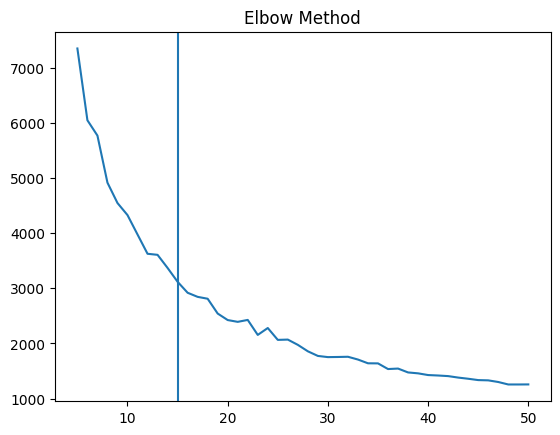

In [42]:
plt.plot(list(range(5,51)),wcss)
plt.title('Elbow Method')   # find the best no. of clusters
plt.axvline(15)
plt.show()

In [43]:
km = KMeans(n_clusters=12)


In [44]:
km.fit(x_transformed)

KMeans(n_clusters=12)

In [48]:
labels = km.labels_
labels

array([9, 9, 9, ..., 4, 4, 4])

In [49]:
df['12_cluster'] = labels

In [50]:
from sklearn.metrics import silhouette_score

In [52]:
silhouette_score(x_transformed, labels)

0.32929310645226667

In [53]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_or_cluster8,12_cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,5,9
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,5,9
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,5,9
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,5,9
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,5,9
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5,4
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,2,4
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2,4


In [55]:
import joblib 

In [56]:
joblib.dump(KMeans,'kmeans_model.lib')

['kmeans_model.lib']

In [57]:
joblib.dump(std,'scaler.lib')

['scaler.lib']

In [58]:
df[df['12_cluster']==0]['label'].unique()

array(['pigeonpeas', 'mothbeans', 'mango'], dtype=object)